The data was collected from the Taiwan Economic Journal for the years 1999to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Dataset description: 
It has 96 columns of data. 
The first attribute is Y, class label
X1 Cost of Interest-bearing Debt
X2 Cash Reinvestment Ratio
X3 Current Ratio
X4 Acid Test
X5 Interest Expenses/Total Revenue
X6 Total Liability/Equity Ratio
X7 Liability/Total Assets
X8 Interest-bearing Debt/Equity
X9 Contingent Liability/Equity
X10 Operating Income/Capital
...
X95 Return on Total Asset Growth

 We will use the Taiwanese Bankruptcy Prediction data set. The dataset correspondsto a classification problem on which you need to make predictions on the basis of whetherthe company can have a risk to bankrupt considering features in the dataset. You are asked to use this data to build Bagging Classifier and Boosting Classifiers model.

In [29]:
#importing important packages
import pandas as pd
import numpy as np

#reading the dataset
df=pd.read_csv("data.csv")

In [30]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [32]:
df.isnull().sum().sum()

0

In [33]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [34]:
df.rename(columns=lambda x: x.strip(), inplace = True)
df.rename(columns=lambda x: x.lower(), inplace = True)
df.rename(columns=lambda x: x.replace(' ','_'), inplace = True)
df.rename(columns=lambda x: x.replace('-','_'), inplace = True)
df.rename(columns=lambda x: x.replace('?',''), inplace = True)

In [35]:
# Selecting Special Columns with small number of unique values
unique_columns = []
for col in df.columns:
    if(df[col].nunique() < 20):
        unique_columns = unique_columns+[col]

In [36]:
unique_columns.remove('bankrupt')
unique_columns

['liability_assets_flag', 'net_income_flag']

In [37]:
df.drop(columns=unique_columns,inplace = True)

In [38]:
#split dataset into train and test

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=42)

X_train=train.drop('bankrupt',axis=1)
y_train=train['bankrupt']

X_test=test.drop('bankrupt',axis=1)
y_test=test['bankrupt']

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4773, 93), (2046, 93), (4773,), (2046,))

### Bagging Classifier

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=42))
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9643206256109482

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,f1_score
cm=confusion_matrix(y_test,model.predict(X_test))
print("Confusion Matrix\n\n",cm)

accuracy = accuracy_score(y_test, model.predict(X_test)) 
precision = precision_score(y_test, model.predict(X_test)) 
recall = recall_score(y_test, model.predict(X_test)) 
f1 = f1_score(y_test, model.predict(X_test))

print("\nAccuracy score:",accuracy,
      "\nPrecision score:",precision,
      "\nRecall score:",recall,
      "\nF1 score:",f1)

Confusion Matrix

 [[1959    9]
 [  64   14]]

Accuracy score: 0.9643206256109482 
Precision score: 0.6086956521739131 
Recall score: 0.1794871794871795 
F1 score: 0.2772277227722772


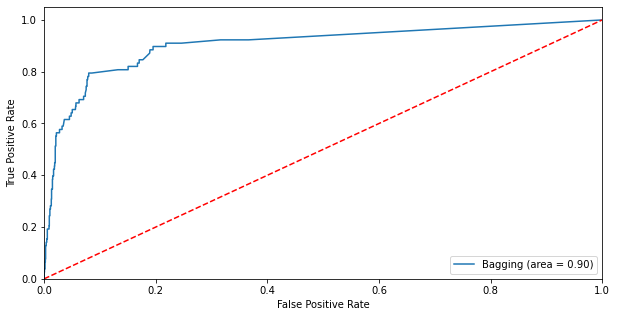

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

result = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Bagging (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9623655913978495

In [45]:
cm=confusion_matrix(y_test,model.predict(X_test))
print("Confusion Matrix\n\n",cm)

accuracy = accuracy_score(y_test, model.predict(X_test)) 
precision = precision_score(y_test, model.predict(X_test)) 
recall = recall_score(y_test, model.predict(X_test)) 
f1 = f1_score(y_test, model.predict(X_test))

print("\nAccuracy score:",accuracy,
      "\nPrecision score:",precision,
      "\nRecall score:",recall,
      "\nF1 score:",f1)

Confusion Matrix

 [[1967    1]
 [  76    2]]

Accuracy score: 0.9623655913978495 
Precision score: 0.6666666666666666 
Recall score: 0.02564102564102564 
F1 score: 0.04938271604938271


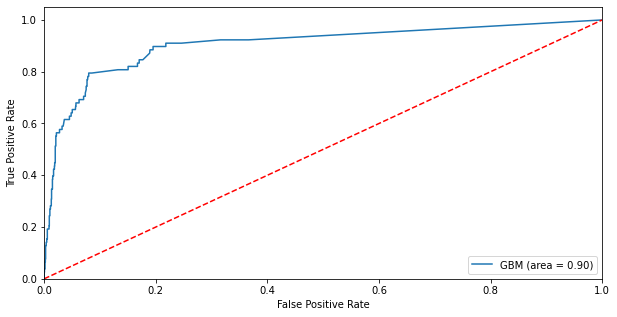

In [47]:
result = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='GBM (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

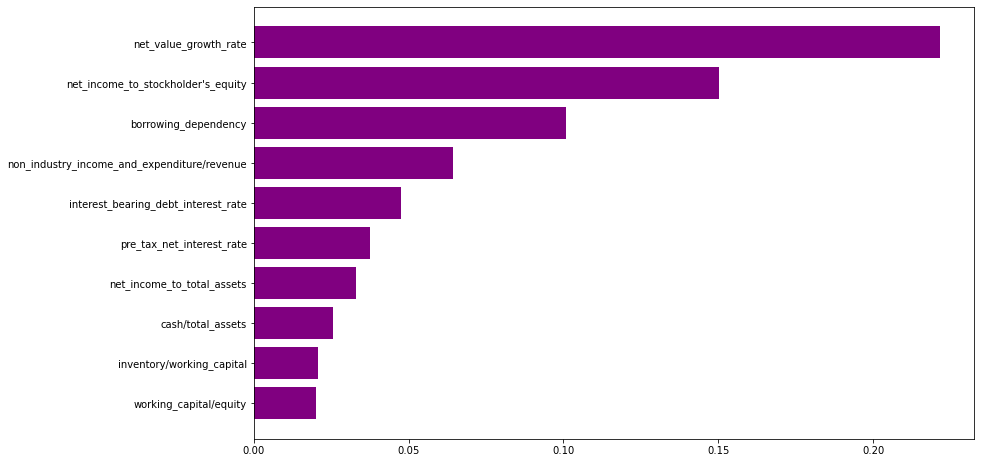

In [50]:
Importance=pd.DataFrame({
    "Features":model.feature_importances_
},index=X_train.columns)
data=Importance.sort_values(by="Features",axis=0,ascending=True)
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.barh(data.index[-10:],data.Features[-10:],color="purple")
plt.show()

### XGBoost Classifier

In [53]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

[12:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9618768328445748

In [55]:
cm=confusion_matrix(y_test,model.predict(X_test))
print("Confusion Matrix\n\n",cm)

accuracy = accuracy_score(y_test, model.predict(X_test)) 
precision = precision_score(y_test, model.predict(X_test)) 
recall = recall_score(y_test, model.predict(X_test)) 
f1 = f1_score(y_test, model.predict(X_test))

print("\nAccuracy score:",accuracy,
      "\nPrecision score:",precision,
      "\nRecall score:",recall,
      "\nF1 score:",f1)

Confusion Matrix

 [[1955   13]
 [  65   13]]

Accuracy score: 0.9618768328445748 
Precision score: 0.5 
Recall score: 0.16666666666666666 
F1 score: 0.25


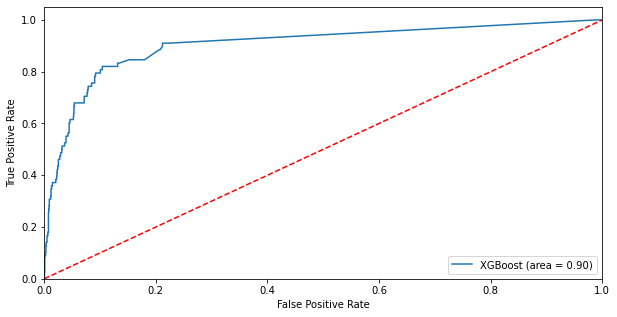

In [58]:
result = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

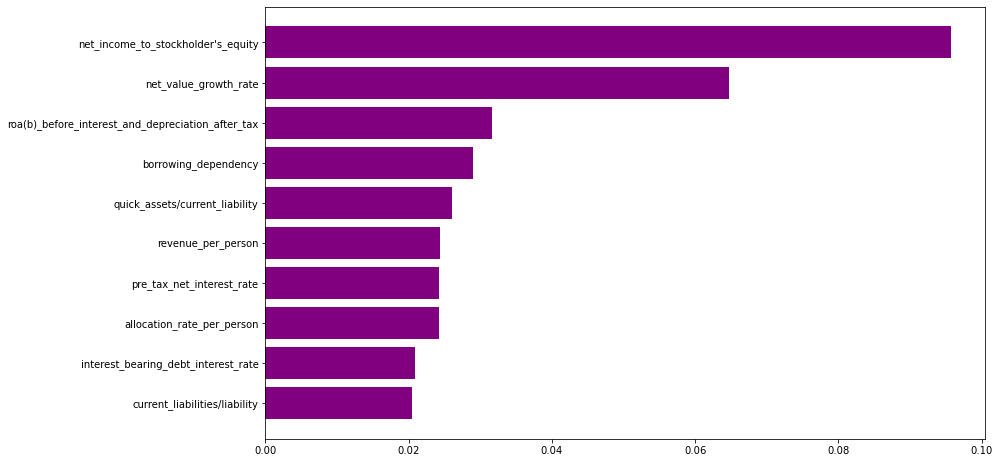

In [61]:
Importance=pd.DataFrame({
    "Features":model.feature_importances_
},index=X_train.columns)
data=Importance.sort_values(by="Features",axis=0,ascending=True)
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.barh(data.index[-10:],data.Features[-10:],color="purple")
plt.show()


### Cat Boost Classifier

In [62]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
model.fit(X_train,y_train,eval_set=(X_test, y_test))
model.score(X_test,y_test)

Learning rate set to 0.04662
0:	learn: 0.6045816	test: 0.6066997	best: 0.6066997 (0)	total: 613ms	remaining: 10m 12s
1:	learn: 0.5242991	test: 0.5281240	best: 0.5281240 (1)	total: 765ms	remaining: 6m 21s
2:	learn: 0.4512693	test: 0.4566214	best: 0.4566214 (2)	total: 978ms	remaining: 5m 24s
3:	learn: 0.3987168	test: 0.4056231	best: 0.4056231 (3)	total: 1.26s	remaining: 5m 14s
4:	learn: 0.3531795	test: 0.3609723	best: 0.3609723 (4)	total: 1.41s	remaining: 4m 40s
5:	learn: 0.3169308	test: 0.3255449	best: 0.3255449 (5)	total: 1.55s	remaining: 4m 17s
6:	learn: 0.2877522	test: 0.2970726	best: 0.2970726 (6)	total: 1.66s	remaining: 3m 55s
7:	learn: 0.2618577	test: 0.2719476	best: 0.2719476 (7)	total: 1.77s	remaining: 3m 40s
8:	learn: 0.2349638	test: 0.2462300	best: 0.2462300 (8)	total: 1.91s	remaining: 3m 30s
9:	learn: 0.2153682	test: 0.2271760	best: 0.2271760 (9)	total: 2.04s	remaining: 3m 22s
10:	learn: 0.1990088	test: 0.2116764	best: 0.2116764 (10)	total: 2.2s	remaining: 3m 17s
11:	learn: 0

0.9652981427174976

In [63]:
cm=confusion_matrix(y_test,model.predict(X_test))
print("Confusion Matrix\n\n",cm)

accuracy = accuracy_score(y_test, model.predict(X_test)) 
precision = precision_score(y_test, model.predict(X_test)) 
recall = recall_score(y_test, model.predict(X_test)) 
f1 = f1_score(y_test, model.predict(X_test))

print("\nAccuracy score:",accuracy,
      "\nPrecision score:",precision,
      "\nRecall score:",recall,
      "\nF1 score:",f1)

Confusion Matrix

 [[1962    6]
 [  65   13]]

Accuracy score: 0.9652981427174976 
Precision score: 0.6842105263157895 
Recall score: 0.16666666666666666 
F1 score: 0.26804123711340205


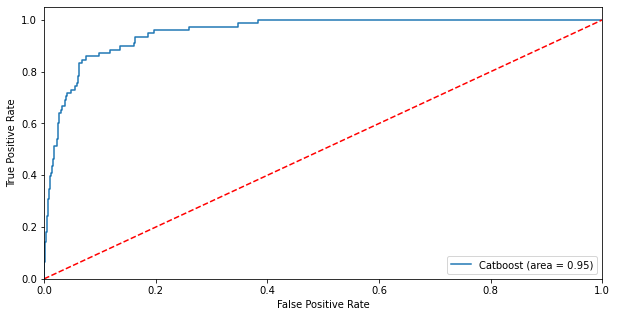

In [65]:
result = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Catboost (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

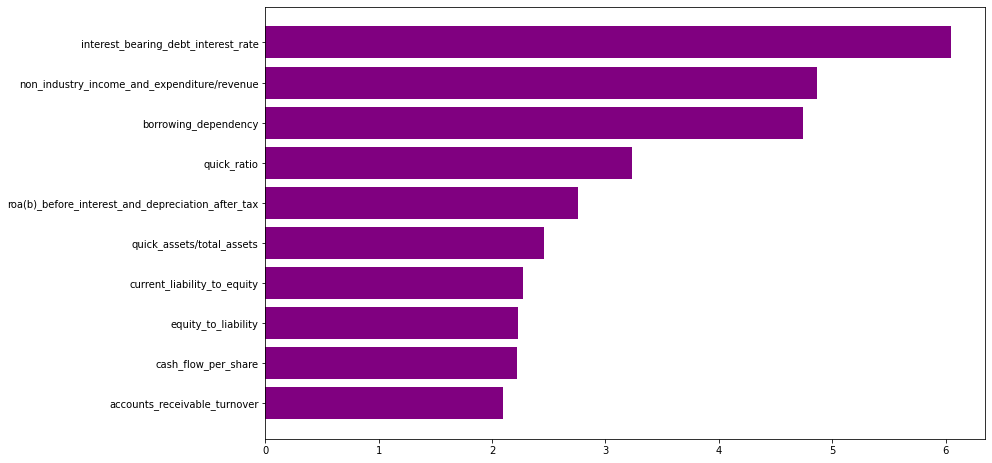

In [66]:
Importance=pd.DataFrame({
    "Features":model.feature_importances_
},index=X_train.columns)
data=Importance.sort_values(by="Features",axis=0,ascending=True)
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.barh(data.index[-10:],data.Features[-10:],color="purple")
plt.show()


### LightGBM Classifier

In [67]:
from lightgbm import LGBMClassifier
model=LGBMClassifier(learning_rate=0.01,n_estimators=240).fit(X_train, y_train)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9633431085043989

In [68]:
cm=confusion_matrix(y_test,model.predict(X_test))
print("Confusion Matrix\n\n",cm)

accuracy = accuracy_score(y_test, model.predict(X_test)) 
precision = precision_score(y_test, model.predict(X_test)) 
recall = recall_score(y_test, model.predict(X_test)) 
f1 = f1_score(y_test, model.predict(X_test))

print("\nAccuracy score:",accuracy,
      "\nPrecision score:",precision,
      "\nRecall score:",recall,
      "\nF1 score:",f1)

Confusion Matrix

 [[1961    7]
 [  68   10]]

Accuracy score: 0.9633431085043989 
Precision score: 0.5882352941176471 
Recall score: 0.1282051282051282 
F1 score: 0.21052631578947367


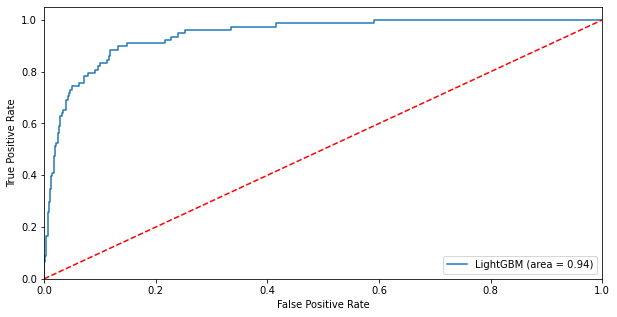

In [69]:
result = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='LightGBM (area = %0.2f)' % result)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

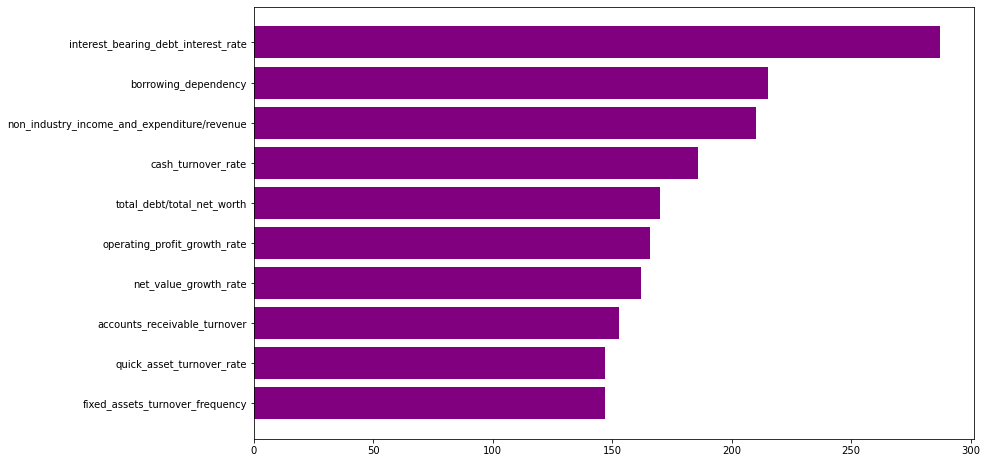

In [71]:
Importance=pd.DataFrame({
    "Features":model.feature_importances_
},index=X_train.columns)
data=Importance.sort_values(by="Features",axis=0,ascending=True)
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.barh(data.index[-10:],data.Features[-10:],color="purple")
plt.show()
